# INM Eventos de transmigrantes presentados antes las autoridades migratorias POR ESTADOS


### Eventos de extranjeros presentados ante la autoridad migratoria, según entidad federativa
Procesamos las tablas estadisticas con datos sobre eventos de migrantes irregulares registrados por el INM por entidad federativa.

Los datos seleccionados se refieren unicamente a los eventos en los que migrantes fueron  ...

    2001 - 2012 la información incluye eventos de extranjeros en situación migratoria irregular a los que el Instituto Nacional de Migración (INM) les inició un procedimiento administrativo de aseguramiento y a los centroamericanos acogidos al “Memorándum de entendimiento entre los gobiernos de los Estados Unidos Mexicanos, de la República de El Salvador, de la República de Guatemala, de la República de Honduras y de la República de Nicaragua, para la repatriación digna, ordenada, ágil y segura de nacionales centroamericanos migrantes vía terrestre” suscrito el 5 de mayo de 2006 y su anexo del 26 de abril de 2007.

    2013 - 2020 la información incluye los eventos de migrantes en situación migratoria irregular a los que se les inició un procedimiento administrativo de presentación por no acreditar su situación migratoria, según lo previsto en los arts. 99, 112 y 113 de la Ley de Migración y del art. 222 de su Reglamento.

    2021 - 2023 la información hace referencia a los eventos de extranjeros en situación migratoria irregular a los que se les inicio un Procedimiento Administrativo Migratorio (PAM) ante el Instituto Nacional de Migración (INM) por no acreditar su situación migratoria, según lo previsto en los arts. 99, 100, 101 y 113 de la Ley de Migración y del art. 222 de su Reglamento 

Y a los que fueron canalizados por esta misma autoridad a los albergues de la red DIF, con PAM iniciado; según lo previsto en los art. 112 y 113 de la Ley de Migración y del art. 222 de su Reglamento, así como de los arts. 89, 94 de la Ley General de los Derechos de Niñas, Niños y Adolescentes.(Excluidos en estas BD para mantener comparabilidad estadistica)

El nombre de datos en el tiempo:

2002 - 2006 "EVENTOS DE ASEGURAMIENTO EN MÉXICO SEGÚN DELEGACIÓN REGIONAL"

2007 - 2012  "Eventos de extranjeros alojados en estaciones migratorias, según entidad federativa"

2013 - 2023 "Eventos de extranjeros presentados ante la autoridad migratoria, según entidad federativa"



### Procesamiento de los datos recopilados

Fuente: http://www.politicamigratoria.gob.mx/es/PoliticaMigratoria/Boletines_Estadisticos

In [2]:
#Librerias Necesarias
import pandas as pd
import glob
import numpy as np
import seaborn as sns
from unidecode import unidecode
import re

import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import matplotlib as mpl

import plotly.express as px
import plotly.graph_objects as go

##### Cargar BD Total_General

Fuente:
Eventos de personas en situación migratoria irregular en México, según entidad federativa.
Todos los años



In [12]:
bd_tw = pd.read_excel("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos/Eventos Estatal/3.1eventos_2001_2023.xlsx")

###### Guardar BD

Actualizamos modificaciones

In [3]:
#bd_tw.to_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/31.2011_Sorted.xlsx", index=False)


In [5]:
# Convertir la columna 'Año' a un tipo numérico
#bd_tw['Año'] = bd_tw['Año'].astype(int)

# Ordenar el DataFrame por 'Año'
#bd_tw = bd_tw.sort_values(by=['Año'], kind='mergesort')


In [13]:
bd_tw.tail(3)


,Entidad federativa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
756,Veracruz,1626,2098,3217,1882,3546,3115,3637,4949,5282,4266,2817,1800,38235,2023
757,Yucatán,37,35,127,336,4,10,23,43,47,83,69,29,843,2023
758,Zacatecas,216,66,286,12,3,7,27,25,164,26,8,0,840,2023


In [7]:
#print(bd_tw['Entidad federativa'].unique())


### Cargar BD: Nacionalidad

Fuente: Eventos de personas en situación migratoria irregular en México, según continente y país de nacionalidad, 2023

In [2]:
bd_tw_nacionalidad = pd.read_excel("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos_Nacionalidad/cuadro3.2(nacionalidad).xlsx")

In [9]:
#bd_tw_nacionalidad.to_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos_Nacionalidad/cuadro3.2(nacionalidad).xlsx", index=False)


#### Correciones siguientes cambiar tipo de celda a codigo.

# Diccionario de correciones
correcciones = {
    'Dominicana Rep': 'República Dominicana',
    'Dominicana Republica': 'República Dominicana',
    'Checa Rep': 'República Checa',
    'Paises Bajos Holanda': 'Países Bajos',
    'Holanda': 'Países Bajos',
    'Mianmar Birmania': 'Myanmar',
    'Centroafricana Rep': 'República Centroafricana',
    'Congo Rep Dem': 'República Democrática del Congo',
    'Costa De Marfil': 'Costa de Marfil',
    'Guinea Bissau': 'Guinea-Bisáu',
    'Santo Tome Y Principe': 'Santo Tomé y Príncipe',
    'Sudafrica': 'Sudáfrica',
    'Nueva Zelandia': 'Nueva Zelanda',
    'Aruba P Bajos': 'Aruba',
    'Micronesia Rep': 'Micronesia',
    'Bosniaherzegovina': 'Bosnia y Herzegovina',
    'Corea Rpd Norte': 'Corea del Norte',
    'Congo Rep': 'República del Congo',
    'Saharaui Rep Arabe': 'Sahara Occidental',
    'Dominica Comonwealth': 'Dominica',
    'Dominica Commonwealth': 'Dominica',
    'Turcos Y Caicos Islas R Unido': 'Islas Turcas y Caicos',
    'Micronesia Rep Eua': 'Micronesia',
    'China Rep Pop': 'China',
    'Kazajstan': 'Kazajistán',
    'Kazajistan': 'Kazajistán',
    'Rwanda': 'Ruanda',
    'Estados Unidos de América': 'Estados Unidos',
    'Bahamas Commonwealth': 'Bahamas',
    'Martinica Terr Ultram Francia': 'Martinica',
    'Guayana Francesa': 'Guayana Francesa',
    'Paises Bajos': 'Países Bajos',
    'Hong Kong China': 'Hong Kong',
    'Corea Rep Sur': 'Corea del Sur',
    'Corea Del Sur': 'Corea del Sur',
    'Zimbabue': 'Zimbabwe'
}

# Corregir los nombres de los países en la columna específica
bd_tw_nacionalidad['Continente/ país de nacionalidad'] = bd_tw_nacionalidad['Continente/ país de nacionalidad'].replace(correcciones)


In [10]:
##Revisamos Manualmente
#print(bd_tw_nacionalidad['Continente/ país de nacionalidad'].unique())

In [9]:
bd_tw_nacionalidad.tail(2)

NameError: name 'bd_tw_nacionalidad' is not defined

## Visualizaciones

#### 1. Total de Eventos por Año

Aqui solo consideramos el apartado de presentados y subtotales,ya que este dato ya incluye el los canalizados.

     -LinePlot
     -BarPlot
     #Agregamos diferenciacion de los distintos criterios de clasificacion de eventos usados por el INM en el tiempo

In [3]:
bd_tw_nacionalidad

,Continente/ país de nacionalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
0,Total General,25158,23924,31747,18104,28544.0,43077,53714,0,0,0,0,0.0,224268,2023
1,America,21031,19530,25083,14935,23321.0,35550,45926,0,0,0,0,0.0,185376,2023
2,America Del Norte,62,68,85,60,53.0,74,99,0,0,0,0,0.0,501,2023
3,Canada,7,1,3,0,2.0,3,3,0,0,0,0,0.0,19,2023
4,Estados Unidos,55,67,82,60,51.0,71,96,0,0,0,0,0.0,482,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,China,18,15,16,12,0.0,10,5,5,6,9,2,9.0,107,2001
2077,Venezuela,0,1,6,0,7.0,12,11,13,10,0,0,2.0,62,2001
2078,Chile,5,3,12,11,2.0,4,2,2,4,0,3,2.0,50,2001
2079,Panama,2,5,4,4,6.0,5,0,5,2,1,5,1.0,40,2001


In [14]:
# Filtrar el df con los resultados a nivel federación ('Total General') por año
df_total_general = bd_tw[bd_tw['Entidad federativa'] == 'Total general']
df_total_general.head(25)

,Entidad federativa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
0,Total general,14061,17965,20613,15770,17368,13947,13283,12731,9740,5423,4727,4902,150530,2001
33,Total general,8968,10722,11443,13930,15040,12784,13415,11996,11781,10607,9686,7689,138061,2002
66,Total general,11556,14945,16998,11558,20391,19253,18046,18027,16409,16480,14302,9649,187614,2003
99,Total general,15242,19095,21434,20526,20726,18204,19715,17936,17999,18240,16559,10019,215695,2004
132,Total general,17673,22118,24267,24509,20592,19922,19657,20376,20630,16208,20545,13772,240269,2005
165,Total general,21867,24547,24892,19234,16870,12926,11487,12183,12480,10601,10109,5509,182705,2006
198,Total general,11215,11910,12473,11796,12004,11095,10846,12520,9047,7292,6431,3826,120455,2007
231,Total general,8970,10787,9305,11031,9747,8394,7585,6705,6521,6894,5506,3278,94723,2008
264,Total general,5943,6246,6884,6742,5701,6872,5718,5789,6039,5450,4388,3261,69033,2009
297,Total general,4759,5796,7336,6695,7075,6378,6760,6755,5098,4714,5077,3659,70102,2010


        ## Agregamos Eventos: "Criterios INM"

In [ ]:
#Hacer la grafica aplanada al mes, utilizar el promedio anual para el punto intermedio

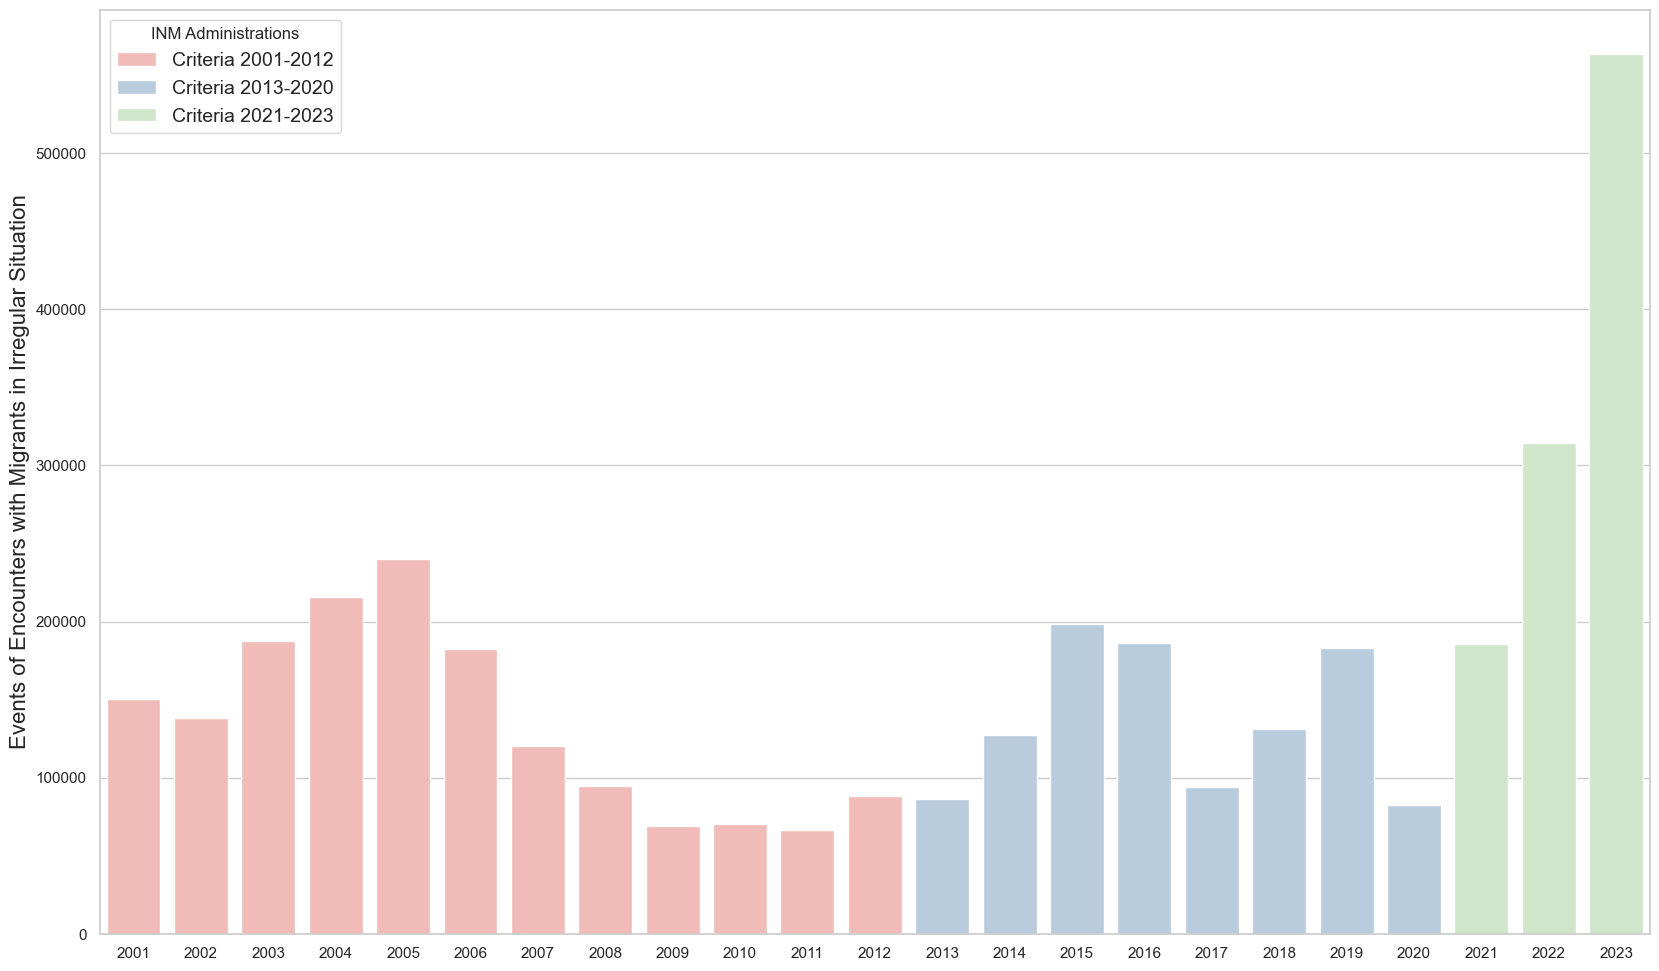

In [16]:
# Seaborn Configuration
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Define the events and their colors (using the Pastel1 palette)
event_colors = {
    'Criteria 2001-2012': sns.color_palette("Pastel1")[0],
    'Criteria 2013-2020': sns.color_palette("Pastel1")[1],
    'Criteria 2021-2023': sns.color_palette("Pastel1")[2]
}

# Plot each group with its respective color
for criteria, color in event_colors.items():
    # Filter the dataframe based on the criteria
    if criteria == 'Criteria 2001-2012':
        data = df_total_general[df_total_general['Año'] <= 2012]
    elif criteria == 'Criteria 2013-2020':
        data = df_total_general[(df_total_general['Año'] > 2012) & (df_total_general['Año'] <= 2020)]
    else:  # 'Criteria 2021-2023'
        data = df_total_general[df_total_general['Año'] > 2020]
    
    # Plot each subset with its respective color
    sns.barplot(x='Año', y='Total', data=data, color=color, label=criteria, ax=ax)

# Add titles and labels
ax.set_ylabel('Events of Encounters with Migrants in Irregular Situation', fontsize=16)
ax.set_xlabel('')

# Create a legend for the events
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='INM Administrations', loc='upper left', fontsize=14)

# Show the plot
plt.show()



/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2830/1443393133.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cambio_Porcentual'] = df_filtered['Total'].pct_change() * 100


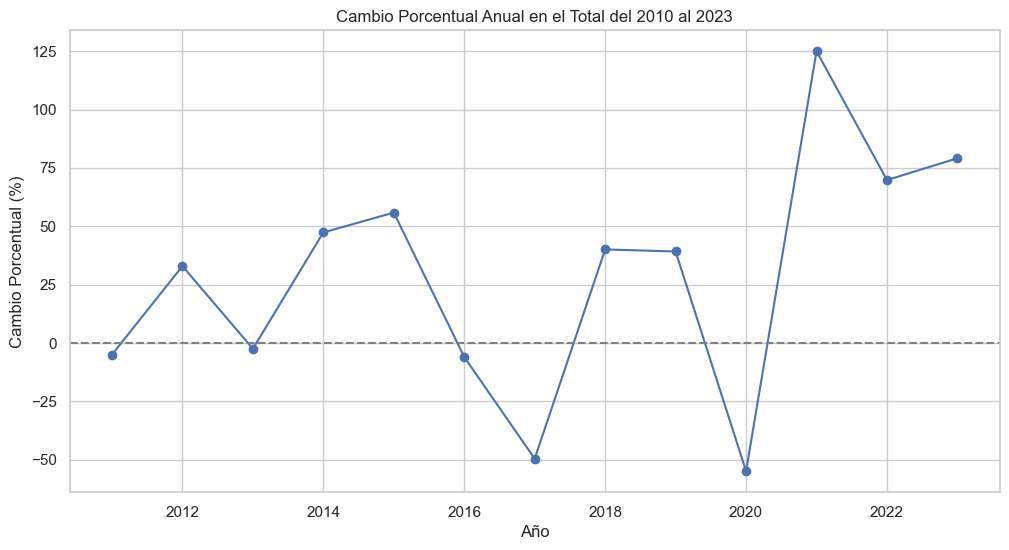

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos desde el año 2010 hasta el 2023
df_filtered = df_total_general[(df_total_general['Año'] >= 2010) & (df_total_general['Año'] <= 2023)]

# Calcular el cambio porcentual año tras año en la columna 'Total'
df_filtered['Cambio_Porcentual'] = df_filtered['Total'].pct_change() * 100

# Eliminar el primer valor que será NaN debido al cálculo del cambio porcentual
df_filtered = df_filtered.dropna(subset=['Cambio_Porcentual'])

# Configurar estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Año'], df_filtered['Cambio_Porcentual'], marker='o', linestyle='-', color='b')

# Añadir una línea horizontal en el valor 0 del eje y
plt.axhline(y=0, color='gray', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cambio Porcentual (%)')
plt.title('Cambio Porcentual Anual en el Total del 2010 al 2023')

# Mostrar la rejilla
plt.grid(True)

# Mostrar el gráfico
plt.show()




### 3: Nacionalidades relevantes en el tiempo


##### Nos quedamos unicamente con paises, ademas de ASIA Y AFRICA

In [20]:
# Lista de categorías a eliminar que contiene el total y los totales por continente que no vamos a usar
categorias_a_eliminar = ['Total General',
                         'America',
                         'America Del Norte',
                         'America Central',
                         'Islas Del Caribe',
                         'America Del Sur',
                         'Europa',
                         'Oceania']#'Apatridas','Otros','Asia','Africa',]

#Nota: todos los continentes ya estaban sumados en las bd originales, por lo que los paises remanentes tienen los datos correctos

##### Tenemos que hacer una eliminacion manual para incluir Asia y Africa en nuestro visual
    Recordamos que ya estan las categorias 'asia' y 'africa' en la bd original, solo hay que quitar los paises para que no entren en el porcentaje.
    
    


In [21]:
asia = ['Afganistan', 'Arabia Saudita', 'Armenia', 'Azerbaiyan', 'Bangladesh', 'Butan', 'China', 
        'Corea del Sur', 'Filipinas', 'Georgia', 'India', 'Indonesia', 'Irak', 'Iran', 'Israel', 
        'Japon', 'Jordania', 'Kazajistán', 'Kirguistan', 'Kuwait', 'Libano', 'Malasia', 'Myanmar', 
        'Mongolia', 'Nepal', 'Pakistan', 'Palestina', 'Singapur', 'Siria', 'Sri Lanka', 'Taiwan', 
        'Tayikistan', 'Turkmenistan', 'Turquia', 'Uzbekistan', 'Vietnam', 'Yemen', 'Hong Kong', 
        'Tailandia', 'Corea del Norte', 'Laos']

africa = ['Angola', 'Argelia', 'Benin', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camerun', 
          'República Centroafricana', 'Chad', 'República Democrática del Congo', 'Costa de Marfil', 
          'Djibouti', 'Egipto', 'Eritrea', 'Etiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 
          'Guinea-Bisáu', 'Guinea Ecuatorial', 'Kenia', 'Liberia', 'Libia', 'Mali', 'Marruecos', 
          'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Ruanda', 'Santo Tomé y Príncipe', 
          'Senegal', 'Sierra Leona', 'Somalia', 'Sudáfrica', 'Sudan', 'Tanzania', 'Togo', 'Tunez', 
          'Uganda', 'Zambia', 'Zimbabwe', 'Malaui', 'Madagascar', 'Camboya', 'Lesoto', 'Mauricio', 
          'República del Congo', 'Sahara Occidental', 'Timor Oriental', 'Tonga', 'Botsuana', 
          'Dominica', 'Santa Lucia', 'Emiratos Arabes Unidos', 'Guadalupe Francia', 'Islas Turcas y Caicos']

# Eliminar filas que contienen estos paises

paises_eliminar = asia + africa + categorias_a_eliminar

# Eliminar filas que contienen estos países
bd_tw_paises = bd_tw_nacionalidad.loc[~bd_tw_nacionalidad['Continente/ país de nacionalidad'].isin(paises_eliminar)]


In [22]:
print(bd_tw_paises['Continente/ país de nacionalidad'].unique())

#bd_tw_paises

['Canada' 'Estados Unidos' 'Belice' 'Costa Rica' 'El Salvador' 'Guatemala'
 'Honduras' 'Nicaragua' 'Panama' 'Antigua Y Barbuda' 'Bahamas' 'Cuba'
 'Republica Dominicana' 'Granada' 'Haiti' 'Jamaica' 'Martinica'
 'Trinidad Y Tobago' 'Argentina' 'Bolivia' 'Brasil' 'Chile' 'Colombia'
 'Ecuador' 'Guayana Francesa' 'Guyana' 'Paraguay' 'Peru' 'Surinam'
 'Uruguay' 'Venezuela' 'Albania' 'Alemania' 'Austria' 'Belgica'
 'Bielorrusia' 'Bulgaria' 'Republica Checa' 'Dinamarca' 'Espana'
 'Finlandia' 'Francia' 'Grecia' 'Hungria' 'Irlanda' 'Italia' 'Kosovo'
 'Macedonia' 'Moldavia' 'Países Bajos' 'Portugal' 'Reino Unido' 'Rumania'
 'Rusia' 'Serbia' 'Suecia' 'Suiza' 'Ucrania' 'Asia' 'Australia'
 'Fiyi Islas' 'Papua Nueva Guinea' 'Africa' 'Republica Centroafricana'
 'Republica Democratica Del Congo' 'Guineabisau' 'Apatridas' 'Croacia'
 'Eslovenia' 'Letonia' 'Luxemburgo' 'Malta' 'Montenegro' 'Noruega'
 'Polonia' 'Nueva Zelanda' 'Vanuatu' 'Aruba' 'Andorra' 'Estonia'
 'Lituania' 'Micronesia' 'Eslovaquia' 'Chi

In [23]:
suma_totalbd_tw_paises = bd_tw_paises['Total'].sum()
print(suma_totalbd_tw_paises)


3439053


#### Creamos df: regiones_top
    -Incluyen==['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Africa', 'Haiti'] + 'Otros'

    ## Si necesitamos seleccionar periodos ( #Año - #Año)


In [24]:
#Filtrar Años de interes
bd_tw_paises1323 = bd_tw_paises[(bd_tw_paises['Año'] >= 2010) & (bd_tw_paises['Año'] <= 2023)]

In [25]:
suma_totalbd_tw_paises1323 = bd_tw_paises1323['Total'].sum()
print(suma_totalbd_tw_paises1323)

2042912


    ## Hay que agregar una categoria "otros".
    ### Para esto boy a crear un subdataframe

In [26]:
# Crear una copia del DataFrame original
df_copy = bd_tw_paises1323.copy()

# Definir las categorías deseadas
categorias_deseadas = ['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba','Haiti']# 'Nicaragua', 'Asia', 'Africa', 

# Modificar la columna "Continente/ país de nacionalidad" para agrupar las categorías no deseadas en "Otros"
df_copy['Continente/ país de nacionalidad'] = df_copy['Continente/ país de nacionalidad'].apply(lambda x: x if x in categorias_deseadas else 'Otros')

# Agrupar y sumar los datos por "Continente/ país de nacionalidad" y "Año"
columnas_meses_total = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Total"]
regiones = df_copy.groupby(['Continente/ país de nacionalidad', 'Año'])[columnas_meses_total].sum().reset_index()

# Ordenar el resultado por "Año"
regiones = regiones.sort_values(by='Año')

# Ordenar el resultado por "Año" y resetear el índice
regiones = regiones.sort_values(by='Año').reset_index(drop=True)

In [27]:
suma_totalregiones = regiones['Total'].sum()
print(suma_totalregiones)

2042912


In [28]:
regiones.tail(20)

,Continente/ país de nacionalidad,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
78,Haiti,2021,25,20,21,66,164.0,975,1417,2792,6549,699,551,312.0,13591
79,Venezuela,2021,11,13,12,42,163.0,181,149,229,316,386,647,407.0,2556
80,Guatemala,2021,2702,3541,4354,3827,4710.0,4260,3984,5462,6229,6335,4568,2770.0,52742
81,Otros,2021,309,415,491,804,1163.0,1582,2159,3032,2403,3127,3185,2468.0,21138
82,El Salvador,2021,437,802,869,1441,1336.0,1093,994,1526,1791,2006,1004,854.0,14153
83,Cuba,2021,52,84,143,179,296.0,600,455,790,838,1102,816,732.0,6087
84,Cuba,2022,1866,2826,4861,4602,2477.0,1978,1850,1465,2134,2148,2277,2111.0,30595
85,Venezuela,2022,1931,771,872,1409,1140.0,2670,4408,12409,11099,16817,8926,8014.0,70466
86,Haiti,2022,211,165,135,209,130.0,72,96,102,175,230,319,932.0,2776
87,Otros,2022,3547,4159,5353,4778,6306.0,4962,4752,6112,7369,9702,13982,12551.0,83573


#### STACKED BARPLOT

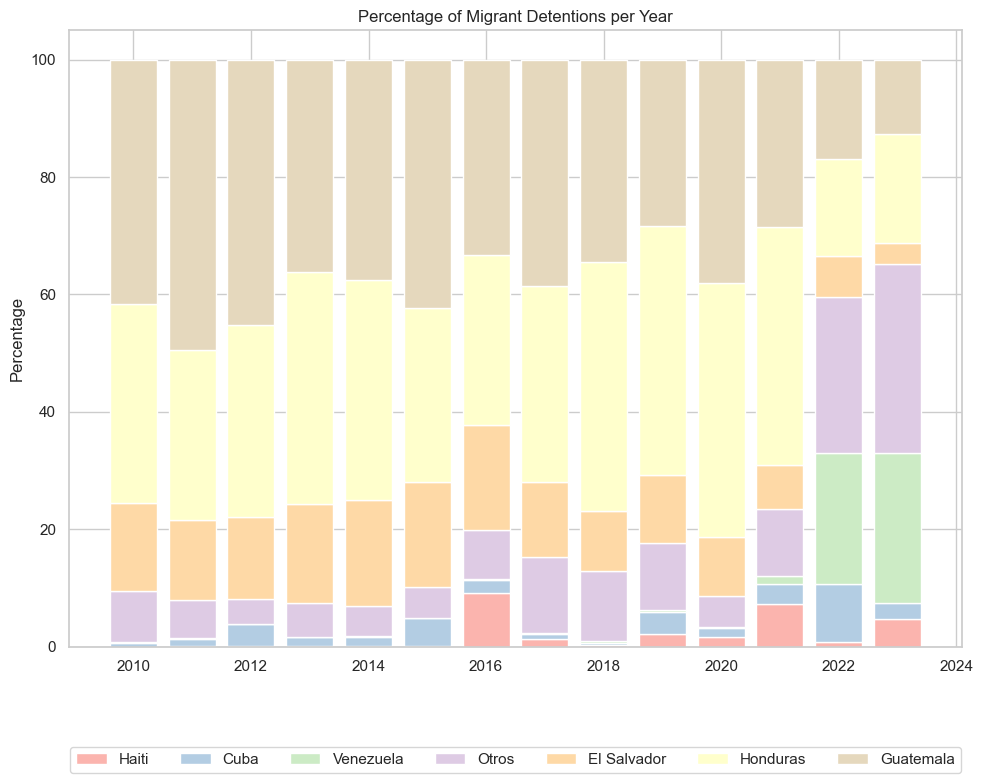

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'regiones' cargado

# Pivotar el DataFrame
df_pivot = regiones.pivot(index='Año', columns='Continente/ país de nacionalidad', values='Total').fillna(0)

# Calcular el porcentaje de cada nacionalidad en cada año
df_percentage = df_pivot.divide(df_pivot.sum(axis=1), axis=0) * 100

# Ordenar las columnas en función de los valores totales de cada nacionalidad
sorted_columns = df_percentage.sum(axis=0).sort_values().index
df_percentage = df_percentage[sorted_columns]

# Configurar la paleta de colores
palette = sns.color_palette("Pastel1", len(df_percentage.columns))

# Crear el gráfico de barras apiladas usando Matplotlib
fig, ax = plt.subplots(figsize=(10, 7))

# Apilar las barras
bottom = pd.Series([0] * len(df_percentage), index=df_percentage.index)
for i, column in enumerate(df_percentage.columns):
    ax.bar(df_percentage.index, df_percentage[column], bottom=bottom, label=column, color=palette[i])
    bottom += df_percentage[column]

# Añadir títulos y etiquetas
ax.set_ylabel('Percentage')
ax.set_xlabel('')
ax.set_title('Percentage of Migrant Detentions per Year')
plt.xticks(rotation=0)
plt.tight_layout()

# Mover la leyenda al pie y orientarla horizontalmente
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(df_percentage.columns))

# Mostrar el gráfico
plt.show()


Migration Policy Institute (MPI) tabulations based on data from U.S. Border Patrol, “U.S. Border Patrol Nationwide Apprehensions by Citizenship and Sector”; CBP, “Southwest Land Border Encounters,” 

        ## Creamos un subdataframe "regiones_top" que incluya columna % porcentajes

In [47]:
# Agrupar por 'Continente/ país de nacionalidad' y sumar 'Total' para cada grupo
regiones_top = regiones.groupby('Continente/ país de nacionalidad')['Total'].sum().reset_index()


In [48]:
# Calcular el total general
total_general1 = regiones_top['Total'].sum()

# Calcular el porcentaje del total para cada fila
regiones_top['Porcentaje'] = (regiones_top['Total'] / total_general1) * 100

In [49]:
# Ordenar el DataFrame por 'Porcentaje' en orden descendente
regiones_top = regiones_top.sort_values('Porcentaje', ascending=False)

regiones_top = regiones_top.reset_index(drop=True)

In [50]:
regiones_top

,Continente/ país de nacionalidad,Total,Porcentaje
0,Honduras,637296,31.195470
1,Guatemala,627363,30.709252
2,Otros,282041,13.805832
3,El Salvador,238216,11.660610
4,Venezuela,132458,6.483784
5,Cuba,74140,3.629133
6,Haiti,51398,2.515918


    ## Hay que agregar una categoria "otros"
    
    ## Graficar



/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_25941/680387684.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




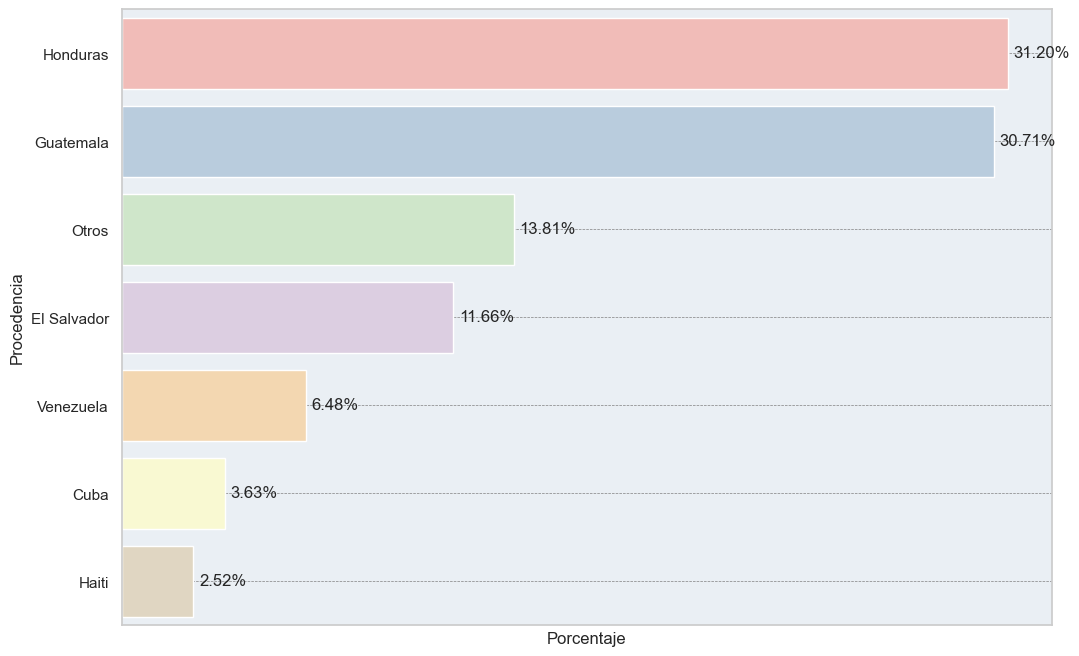

In [51]:
# Lista de países/regiones a incluir
#paises_incluir = ['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Africa', 'Haiti']

# Filtrar el DataFrame para quedarte solo con las filas de los países/regiones que deseas visualizar
#paises_top_filtrado = paises_top[paises_top['Continente/ país de nacionalidad'].isin(paises_incluir)]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=regiones_top['Porcentaje'], y='Continente/ país de nacionalidad', data=regiones_top, palette='Pastel1')

# Añadir un fondo azul transparente
barplot.set_facecolor((0.2, 0.4, 0.6, 0.1))  # Color RGBA, donde A es el alfa (transparencia)

# Añadir una cuadrícula gris
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Añadir anotaciones de texto para mostrar el porcentaje al final de cada barra
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.2,  # posición x
             p.get_y() + p.get_height() / 2,  # posición y
             '{:1.2f}%'.format(width),  # etiqueta con 2 decimales
             va='center')  # alineación vertical

# Añadir títulos y etiquetas
#plt.title('% de Eventos de personas en situación migratoria irregular en México, según Región/ Continente 2008-2023')
#plt.xlabel('Porcentaje del Total')
plt.ylabel('Procedencia')

# Eliminar las etiquetas del eje x
plt.xticks([])

# Mostrar el gráfico
plt.show()


In [52]:
import plotly.express as px

# Asumiendo que regiones_top es tu DataFrame y ya contiene la columna 'Porcentaje'

# Formatear la columna 'Porcentaje' a dos decimales
regiones_top['Porcentaje Formateado'] = regiones_top['Porcentaje'].apply(lambda x: '{:.2f}%'.format(x))

# Crear el treemap
fig = px.treemap(regiones_top, 
                 path=['Continente/ país de nacionalidad'], 
                 values='Porcentaje',
                 color_discrete_sequence=px.colors.qualitative.Pastel1)

# Añadir porcentajes a las etiquetas
fig.data[0].textinfo = 'label+percent entry'

# Agregar líneas delimitantes a cada recuadro
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Modificar el tamaño de la visualización
fig.update_layout(width=1000, height=600)

# Mostrar el gráfico
fig.show()



/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_25941/3738517719.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




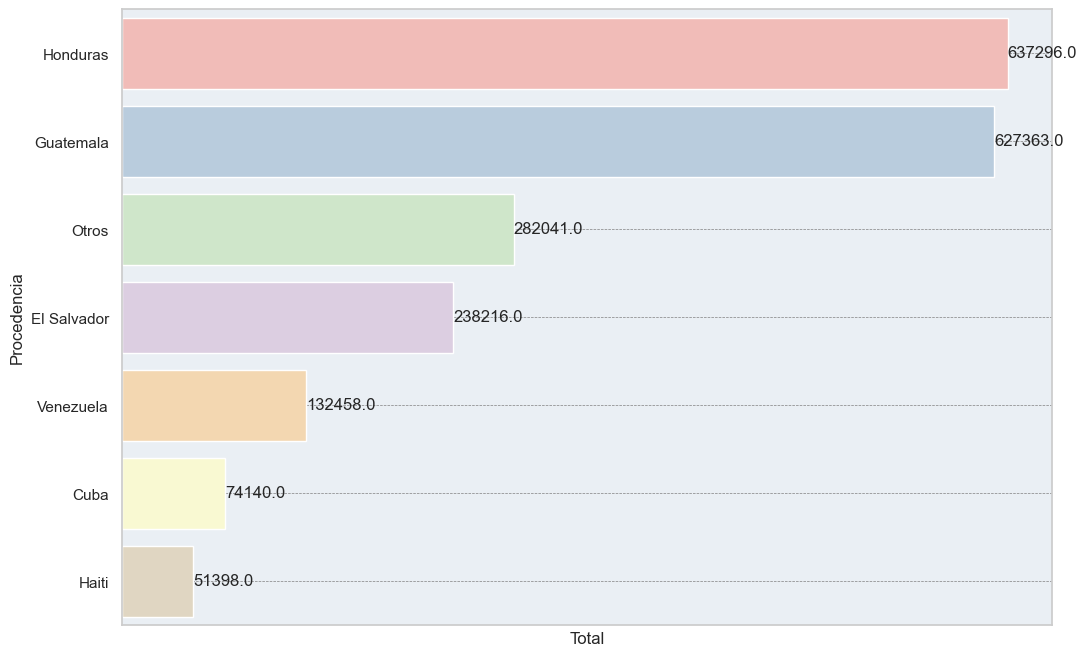

In [53]:
# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Total', y='Continente/ país de nacionalidad', data = regiones_top, palette='Pastel1')

# Add a transparent blue background
barplot.set_facecolor((0.2, 0.4, 0.6, 0.1))  # RGBA color, where A is the alpha (transparency)

# Add a gray grid
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add text annotations for showing the percentage at the end of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.2,  # x position
             p.get_y() + p.get_height() / 2,  # y position
             '{:1}'.format(width),  # label with 3 decimal places
             va='center')  # vertical alignment

# Add titles and labels
#plt.title('% de Eventos de personas en situación migratoria irregular en México, según Región/ Continente 2008-2023')
#plt.xlabel('Porcentaje del Total')
plt.ylabel('Procedencia')

# Remove the x-axis labels
plt.xticks([])

# Show the plot
plt.show()

##### Lineplot:  eventos/año y %eventos/año  (paises top)

In [54]:
#Filtrar Años de interes
#bd_tw_paises0823 = bd_tw_paises[(bd_tw_paises['Año'] >= 2008) & (bd_tw_paises['Año'] <= 2023)]

In [55]:
# Lista de países para filtrar
paises_filtrar = ['Guatemala', 'Honduras', 'El Salvador', 'Venezuela', 'Cuba', 'Nicaragua', 'Asia', 'Haiti', 'Africa']

# Crear el subconjunto del DataFrame
subset_eventosañopais = bd_tw_paises1323.loc[bd_tw_paises['Continente/ país de nacionalidad'].isin(paises_filtrar)]


In [56]:
subset_eventosañopais.tail(3)

,Continente/ país de nacionalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
1563,Venezuela,1,8,6,5,4.0,9,16,5,6,8,4,9.0,81,2010
1593,Asia,35,27,41,40,101.0,52,83,136,176,186,91,81.0,1049,2010
1621,Africa,105,148,157,160,80.0,58,124,119,134,83,51,63.0,1282,2010


###### Necesitamos derretir las columnas en un formato de fecha para graficar

In [58]:
# Derretir el DataFrame para que cada fila represente un único mes y año para un país
df_melted = pd.melt(subset_eventosañopais, id_vars=['Continente/ país de nacionalidad', 'Año'], 
                    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], 
                    var_name='Mes', value_name='Totalev')

# Mapear los nombres de los meses en español a inglés
meses_ingles = {'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April', 
                'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August', 
                'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'}
df_melted['Mes'] = df_melted['Mes'].map(meses_ingles)

# Crear una nueva columna 'Fecha' que combine 'Año' y 'Mes'
df_melted['Fecha'] = df_melted['Mes'].astype(str) + '-' + df_melted['Año'].astype(str)
df_melted['Fecha'] = pd.to_datetime(df_melted['Fecha'], format='%B-%Y')

# Ordenar df_melted por 'Fecha'
df_melted = df_melted.sort_values('Fecha')


In [59]:
# Dar formato 'DT' a la columna Año para las etiquetas
df_melted['Año'] = df_melted['Fecha'].dt.year

In [60]:
df_melted.head(5)

,Continente/ país de nacionalidad,Año,Mes,Totalev,Fecha
117,El Salvador,2010,January,795.0,2010-01-01
125,Africa,2010,January,105.0,2010-01-01
124,Asia,2010,January,35.0,2010-01-01
123,Venezuela,2010,January,1.0,2010-01-01
118,Guatemala,2010,January,1926.0,2010-01-01


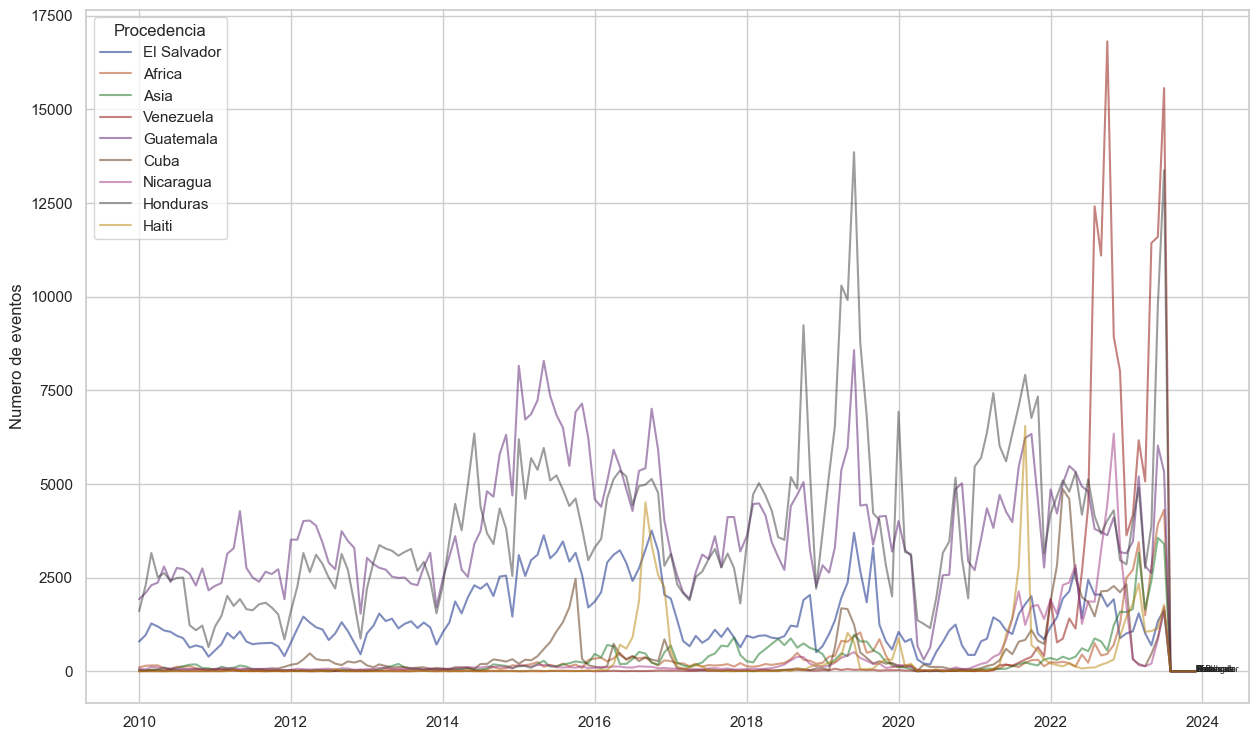

In [62]:
# Obtener el número de categorías únicas en la columna 'Continente/ país de nacionalidad'
num_categorias = df_melted['Continente/ país de nacionalidad'].nunique()

# Obtener una paleta de colores con al menos tantos colores como categorías únicas
colores = sns.color_palette('dark', n_colors=num_categorias)

# Modificar la intensidad de cada color
colores_modificados = [(r, g, b, 0.5) for r, g, b in colores]  # 0.5 es la intensidad (alpha)

# Crear el gráfico de líneas
plt.figure(figsize=(15, 9))
sns.lineplot(data=df_melted, x='Fecha', y='Totalev', hue='Continente/ país de nacionalidad', palette=colores_modificados)

# Añadir títulos y etiquetas
plt.ylabel('Numero de eventos')
plt.xlabel('')  # Eliminar el título del eje x

# Cambiar el título del cuadro de leyenda
leg = plt.gca().get_legend()
leg.set_title('Procedencia')

# Obtener los valores finales de cada línea y añadir las etiquetas
for cont_pais in df_melted['Continente/ país de nacionalidad'].unique():
    df_sub = df_melted[df_melted['Continente/ país de nacionalidad'] == cont_pais]
    if not df_sub.empty:
        ultimo_punto = df_sub.iloc[-1]
        plt.text(ultimo_punto['Fecha'], ultimo_punto['Totalev'], cont_pais, fontsize=6)

# Mostrar el gráfico
plt.show()


In [ ]:
#Algo Adicional podria ser poner una tabla comparativa con los totales y las posiciones de cada pais en 2013, 2018 y 2022-23

### Datos de rutas 2023

In [3]:
bd_tw = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos/Eventos Municipal/3.1_mun_2023_centr.csv")

In [24]:
bd_tw


,ciudad,Latitude,Longitude,Coordinates,enero_presentados,enero_canalizados,enero_total,febrero_presentados,febrero_canalizados,febrero_total,...,octubre_total,noviembre_presentados,noviembre_canalizados,noviembre_total,diciembre_presentados,diciembre_canalizados,diciembre_total,total_presentados,total_canalizados,total_total
0,"Aguascalientes, Aguascalientes",22.000000,-102.500000,"22.0000001,-102.5000001",153,13,166,155,19,174,...,30,0,0,0,0,0,0,348,75,423
1,"Cosío, Aguascalientes",22.370515,-102.312009,"22.3705155,-102.31200851052341",0,0,0,0,0,0,...,27,1,20,21,0,16,16,27,71,98
2,"Jesús María, Aguascalientes",21.934555,-102.468452,"21.934555500000002,-102.46845171651151",0,0,0,0,0,0,...,0,2,5,7,0,0,0,8,12,20
3,"San Francisco de los Romo, Aguascalientes",22.074628,-102.270713,"22.0746282,-102.2707133",0,0,0,0,0,0,...,3,0,0,0,0,0,0,3,15,18
4,"Ensenada, Baja California",31.865889,-116.602983,"31.8658887,-116.602983",4,0,4,1,0,1,...,0,0,0,0,1,0,1,23,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"Valladolid, Yucatán",20.690251,-88.201700,"20.6902505,-88.2016999",0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,5
385,"Calera, Zacatecas",22.978480,-102.856223,"22.978479999999998,-102.85622288611614",0,0,0,0,0,0,...,0,1,11,12,0,0,0,26,16,42
386,"Jerez, Zacatecas",22.710593,-103.001473,"22.7105933,-103.00147264243049",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
387,"Trancoso, Zacatecas",22.735302,-102.366797,"22.7353025,-102.3667969",0,0,0,0,0,0,...,50,1,2,3,0,0,0,17,79,96


In [5]:
bd_tw1 = pd.read_excel("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos/Eventos Municipal/cuadro3.1.a (1).xls")

In [31]:
#bd_tw1_municipio.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos/Eventos Municipal/detenciones_municipal.csv")

In [30]:
bd_tw1_municipio

,ciudad,latitude,longitude,etiqueta,entidad federativa / municipio,presentados 1,canalizados 1,subtotal 1,presentados 2,canalizados 2,...,subtotal 10,presentados 11,canalizados 11,subtotal 11,presentados 12,canalizados 2.1,subtotal 12,presentados total,canalizados total,total
0,"Aguascalientes, Aguascalientes",22.000000,-102.500000,municipio,"Aguascalientes, Ags.",0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,15.0,44.0
1,"Cosío, Aguascalientes",22.370515,-102.312009,municipio,"Cosío, Ags.",0.0,0.0,0.0,0.0,0.0,...,27.0,1.0,20.0,21.0,0.0,16.0,16.0,27.0,71.0,98.0
2,"Jesús María, Aguascalientes",21.934555,-102.468452,municipio,"Jesús María, Ags.",153.0,13.0,166.0,155.0,19.0,...,29.0,2.0,5.0,7.0,0.0,0.0,0.0,327.0,72.0,399.0
3,"San Francisco de los Romo, Aguascalientes",22.074628,-102.270713,municipio,"San Francisco de los Romo, Ags.",0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,18.0
4,"Ensenada, Baja California",31.865889,-116.602983,municipio,"Ensenada, BC",4.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.0,3.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"Valladolid, Yucatán",20.690251,-88.201700,municipio,"Valladolid, Yuc.",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
385,"Calera, Zacatecas",22.978480,-102.856223,municipio,"Calera, Zac.",0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,11.0,12.0,0.0,0.0,0.0,26.0,16.0,42.0
386,"Jerez, Zacatecas",22.710593,-103.001473,municipio,"Jerez, Zac.",0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
387,"Trancoso, Zacatecas",22.735302,-102.366797,municipio,"Trancoso, Zac.",0.0,0.0,0.0,0.0,0.0,...,50.0,1.0,2.0,3.0,0.0,0.0,0.0,20.0,79.0,99.0


In [21]:
# Crear el sub-DataFrame con solo las filas con la etiqueta 'municipio'
bd_tw1_municipio = bd_tw1[bd_tw1['Etiqueta'] == 'municipio']

In [25]:
# Resetear el índice del sub-DataFrame
bd_tw1_municipio.reset_index(drop=True, inplace=True)

In [27]:
bd_tw1_municipio = bd_tw1_municipio.join(bd_tw[['ciudad', 'Latitude', 'Longitude']], how='left')

# Mover las columnas 'ciudad', 'Latitude', y 'Longitude' al principio
cols = ['ciudad', 'Latitude', 'Longitude'] + [col for col in bd_tw1_municipio.columns if col not in ['ciudad', 'Latitude', 'Longitude']]
bd_tw1_municipio = bd_tw1_municipio[cols]

In [29]:
# Cambiar todos los nombres de columnas a minúsculas
bd_tw1_municipio.columns = bd_tw1_municipio.columns.str.lower()


In [119]:
df_values= pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv")

In [111]:
#df_values.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv")

In [117]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [121]:
# Convertir la columna 'geometry' a objetos LineString
df_values['geometry_xy'] = df_values['geometry_xy'].apply(wkt.loads)

# Convertir el DataFrame 'arcos' a un GeoDataFrame
df_values_gdf = gpd.GeoDataFrame(df_values, geometry='geometry_xy')

# Definir el sistema de coordenadas (CRS) si es necesario
df_values_gdf.set_crs(epsg=4326, inplace=True)

,nombre,ciudad,estado,region,id_poligono,geometry_xy,codigo_unico,eventos,inm_30km,inm_in_grid,inm_in_estado,eventos_edo,eventos_grid,sc_30km,promedio_sc_30km,sc_estado
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,PG1530,POINT (-92.26093 14.90429),S-PG1530-8,70665.0,2,4,13,223058,113641,67,22.333333,117.0
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,Golfo,PG1456,POINT (-93.66344 17.76210),G-PG1456-1,86684.0,0,0,3,290299,86684,0,0.000000,43.0
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,Golfo,PG1495,POINT (-92.77479 18.02716),G-PG1495-6,74160.0,1,1,3,290299,105212,7,2.833333,43.0
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,Golfo,PG1378,POINT (-94.91458 17.94879),G-PG1378-4,36446.0,1,1,3,66430,45773,25,15.000000,54.0
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,Golfo,PG1572,POINT (-91.42202 17.47071),G-PG1572-3,39620.0,1,2,3,290299,53905,34,19.333333,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"San Juan Huactzinco, Tlaxcala","San Juan Huactzinco, Tlaxcala",Tlaxcala,Centro,PG1224,POINT (-98.25204 19.23293),C-PG1224-2,1.0,2,1,0,7686,5071,45,17.909091,8.0
385,"Amaxac de Guerrero, Tlaxcala","Amaxac de Guerrero, Tlaxcala",Tlaxcala,Centro,PG1224,POINT (-98.16778 19.34889),C-PG1224-12,1.0,1,1,0,7686,5071,11,17.909091,8.0
386,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,Sur,PG1531,POINT (-92.41927 15.79355),S-PG1531-1,NaN,0,4,13,223058,988,0,3.000000,117.0
387,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,Golfo,PG1339,POINT (-95.71540 18.32836),G-PG1339-4,1.0,0,0,3,66430,3221,0,0.600000,54.0


In [124]:
#df_values_gdf.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.shp")

In [125]:
df_values

,nombre,ciudad,estado,region,id_poligono,geometry_xy,codigo_unico,eventos,inm_30km,inm_in_grid,inm_in_estado,eventos_edo,eventos_grid,sc_30km,promedio_sc_30km,sc_estado
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,PG1530,POINT (-92.2609265 14.9042905),S-PG1530-8,70665.0,2,4,13,223058,113641,67,22.333333,117.0
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,Golfo,PG1456,POINT (-93.6634408051158 17.7620967),G-PG1456-1,86684.0,0,0,3,290299,86684,0,0.000000,43.0
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,Golfo,PG1495,POINT (-92.7747911804616 18.0271588),G-PG1495-6,74160.0,1,1,3,290299,105212,7,2.833333,43.0
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,Golfo,PG1378,POINT (-94.9145752 17.9487862),G-PG1378-4,36446.0,1,1,3,66430,45773,25,15.000000,54.0
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,Golfo,PG1572,POINT (-91.4220212 17.4707129),G-PG1572-3,39620.0,1,2,3,290299,53905,34,19.333333,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"San Juan Huactzinco, Tlaxcala","San Juan Huactzinco, Tlaxcala",Tlaxcala,Centro,PG1224,POINT (-98.2520375 19.2329326),C-PG1224-2,1.0,2,1,0,7686,5071,45,17.909091,8.0
385,"Amaxac de Guerrero, Tlaxcala","Amaxac de Guerrero, Tlaxcala",Tlaxcala,Centro,PG1224,POINT (-98.167778 19.348889),C-PG1224-12,1.0,1,1,0,7686,5071,11,17.909091,8.0
386,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,Sur,PG1531,POINT (-92.4192662013789 15.7935524),S-PG1531-1,NaN,0,4,13,223058,988,0,3.000000,117.0
387,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,Golfo,PG1339,POINT (-95.7154033804156 18.32836115),G-PG1339-4,1.0,0,0,3,66430,3221,0,0.600000,54.0


In [107]:
# Calcular la suma de 'eventos' por 'estado'
eventos_por_estado = df_values.groupby('estado')['eventos'].sum().reset_index()

# Renombrar la columna para poder hacer el merge
eventos_por_estado.rename(columns={'eventos': 'eventos_edo_total'}, inplace=True)

# Unir con el DataFrame original
df_values = df_values.merge(eventos_por_estado, on='estado', how='left')

# Actualizar la columna 'eventos_edo' con los valores sumados
df_values['eventos_edo'] = df_values['eventos_edo_total']

# Eliminar la columna auxiliar después de la actualización
df_values.drop(['eventos_edo_total'], axis=1, inplace=True)


In [109]:
# Calcular la suma de 'eventos' por 'id_poligono'
eventos_por_poligono = df_values.groupby('id_poligono')['eventos'].sum().reset_index()

# Renombrar la columna para poder hacer el merge
eventos_por_poligono.rename(columns={'eventos': 'eventos_grid_total'}, inplace=True)

# Unir con el DataFrame original
df_values = df_values.merge(eventos_por_poligono, on='id_poligono', how='left')

# Actualizar la columna 'eventos_grid' con los valores sumados
df_values['eventos_grid'] = df_values['eventos_grid_total']

# Eliminar la columna auxiliar después de la actualización
df_values.drop(['eventos_grid_total'], axis=1, inplace=True)


In [89]:
bd_tw1 = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos/Eventos Municipal/total_presentados_mun.csv")

In [113]:
#bd_tw1.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/2. datos_estadisticos/1. Detenciones INM/Total_De_Eventos/Eventos Municipal/total_presentados_mun.csv")

In [114]:
bd_tw1.head(6)

,Unnamed: 0.1,Unnamed: 0,Entidad Federativa / Municipio,Presentados,Municipio
0,0,5,"Aguascalientes, Aguascalientes",44,Aguascalientes
1,1,6,"Cosio, Aguascalientes",98,Aguascalientes
2,2,7,"Jesus Maria, Aguascalientes",399,Aguascalientes
3,3,8,"San Francisco de los Romo, Aguascalientes",18,Aguascalientes
4,4,11,"Ensenada, Baja California",26,Baja California
5,5,12,"Mexicali, Baja California",5667,Baja California


In [105]:
# Eliminar los espacios en la columna 'Presentados' de bd_tw1
#bd_tw1['Presentados'] = bd_tw1['Presentados'].str.replace(' ', '')

# Convertir la columna 'eventos' a numérico en df_values
df_values['eventos'] = pd.to_numeric(df_values['eventos'], errors='coerce')


In [98]:
# Unir df_values con bd_tw1 para obtener los valores de 'Presentados'
df_values = df_values.merge(bd_tw1[['Entidad Federativa / Municipio', 'Presentados']], 
                            left_on='ciudad', right_on='Entidad Federativa / Municipio', 
                            how='left')

# Actualizar la columna 'eventos' con los valores de 'Presentados'
df_values['eventos'] = df_values['Presentados']



In [101]:
# Eliminar las columnas innecesarias después de la unión
df_values.drop(['Entidad Federativa / Municipio', 'Presentados'], axis=1, inplace=True)


In [60]:
import pandas as pd
import unidecode

# Función para eliminar acentos de una serie
def remove_accents(series):
    return series.apply(lambda x: unidecode.unidecode(x) if isinstance(x, str) else x)

# Aplicar la función para eliminar acentos en todas las columnas del DataFrame
bd_tw1 = bd_tw1.apply(remove_accents)

# Verificar el resultado
print(bd_tw1.head())


   Unnamed: 0             Entidad Federativa / Municipio Presentados  \
0           5             Aguascalientes, Aguascalientes          44   
1           6                      Cosio, Aguascalientes          98   
2           7                Jesus Maria, Aguascalientes         399   
3           8  San Francisco de los Romo, Aguascalientes          18   
4          11                  Ensenada, Baja California          26   

         Municipio  
0   Aguascalientes  
1   Aguascalientes  
2   Aguascalientes  
3   Aguascalientes  
4  Baja California  


In [49]:
bd_tw1['Municipio'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de Mexico', 'Coahuila',
       'Colima', 'Durango', 'Estado de Mexico', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'Michoacan', 'Morelos', 'Nayarit',
       'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo',
       'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'], dtype=object)

In [22]:
# Eliminar todas las filas que sean completamente NaN
bd_tw1.dropna(how='all', inplace=True)

# Eliminar todas las columnas que sean completamente NaN
bd_tw1.dropna(axis=1, how='all', inplace=True)

# Mostrar el DataFrame resultante
print(bd_tw1.head())

  Entidad Federativa / Municipio Presentados
2                  Total general     563 569
4                 Aguascalientes         386
5           Aguascalientes, Ags.          29
6                    Cosío, Ags.          27
7              Jesús María, Ags.         327


In [26]:
# Filtrar el DataFrame para mantener solo las filas donde "Entidad Federativa / Municipio" contiene una coma
bd_tw1 = bd_tw1[bd_tw1['Entidad Federativa / Municipio'].str.contains(',', na=False)]


In [28]:
# Crear una nueva columna con el texto después de la coma
bd_tw1['Municipio'] = bd_tw1['Entidad Federativa / Municipio'].apply(lambda x: x.split(',')[1].strip())



/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2956/1001680089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_tw1['Municipio'] = bd_tw1['Entidad Federativa / Municipio'].apply(lambda x: x.split(',')[1].strip())


In [34]:
# Diccionario de mapeo de abreviaturas a nombres completos
estado_abreviaturas = {
    'Ags.': 'Aguascalientes',
    'BC': 'Baja California',
    'BCS': 'Baja California Sur',
    'Camp.': 'Campeche',
    'Chis.': 'Chiapas',
    'Chih.': 'Chihuahua',
    'CDMX': 'Ciudad de Mexico',
    'Coah.': 'Coahuila',
    'Col.': 'Colima',
    'Dgo.': 'Durango',
    'Méx.': 'Estado de Mexico',
    'Gto.': 'Guanajuato',
    'Gro.': 'Guerrero',
    'Hgo.': 'Hidalgo',
    'Jal.': 'Jalisco',
    'Mich.': 'Michoacan',
    'Mor.': 'Morelos',
    'Nay.': 'Nayarit',
    'NL': 'Nuevo Leon',
    'Oax.': 'Oaxaca',
    'Pue.': 'Puebla',
    'Qro.': 'Queretaro',
    'Q. Roo': 'Quintana Roo',
    'SLP': 'San Luis Potosi',
    'Sin.': 'Sinaloa',
    'Son.': 'Sonora',
    'Tab.': 'Tabasco',
    'Tamps.': 'Tamaulipas',
    'Tlax.': 'Tlaxcala',
    'Ver.': 'Veracruz',
    'Yuc.': 'Yucatan',
    'Zac.': 'Zacatecas'
}

# Convertir las abreviaturas a nombres completos en la columna Municipio
bd_tw1['Municipio'] = bd_tw1['Municipio'].map(estado_abreviaturas)

# Mostrar el DataFrame resultante con la nueva columna
print(bd_tw1.head())


     Entidad Federativa / Municipio Presentados        Municipio
5              Aguascalientes, Ags.          29   Aguascalientes
6                       Cosío, Ags.          27   Aguascalientes
7                 Jesús María, Ags.         327   Aguascalientes
8   San Francisco de los Romo, Ags.           3   Aguascalientes
11                     Ensenada, BC          23  Baja California


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2956/1195532657.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_tw1['Municipio'] = bd_tw1['Municipio'].map(estado_abreviaturas)


In [36]:
# Definir una función para realizar el reemplazo
def reemplazar_texto(fila):
    entidad = fila['Entidad Federativa / Municipio'].split(',')[0]
    municipio = fila['Municipio']
    return f"{entidad}, {municipio}"

# Aplicar la función a cada fila del DataFrame
bd_tw1['Entidad Federativa / Municipio'] = bd_tw1.apply(reemplazar_texto, axis=1)

# Mostrar el DataFrame resultante
print(bd_tw1.head())


               Entidad Federativa / Municipio Presentados        Municipio
5              Aguascalientes, Aguascalientes          29   Aguascalientes
6                       Cosío, Aguascalientes          27   Aguascalientes
7                 Jesús María, Aguascalientes         327   Aguascalientes
8   San Francisco de los Romo, Aguascalientes           3   Aguascalientes
11                  Ensenada, Baja California          23  Baja California


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2956/1123431203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_tw1['Entidad Federativa / Municipio'] = bd_tw1.apply(reemplazar_texto, axis=1)
